In [2]:
# pyspark --conf “spark.ui.port=10101”

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 212.3MB 43kB/s 
     |████████████████████████████████| 204kB 47.9MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=a6022d915bfa95d07069a229b5caaa822f5bdac926affcca3e0dad2accc520a3
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 36.5 MB of archives.
After this 

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# Let's import the libraries we will need
import pandas as pd
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import math
from numpy.linalg import norm
%matplotlib inline

In [39]:
text_file = "ratings.train.txt"

In [205]:
with open(text_file, 'r') as f:
  data = f.readlines()
  users = []
  items = []
  for line in data:
    [u, i, r] = line.split()
    users.append(int(u))
    items.append(int(i))
  print(max(users))
  print(max(items))

943
1682


In [224]:
# initialize the matrices P and Q
P = np.random.uniform(0, (5 / k) ** 0.5, size = (943, 20))
Q = np.random.uniform(0, (5 / k) ** 0.5, size = (1682, 20))

In [225]:
def error_fun(file, P, Q, Lambda):

  E = 0

  data = open(file, 'r')
  for line in data:
    row =  [int(x) for x in line.split()]
    u = row[0] - 1
    i = row[1] - 1
    R = row[2]

    E += (R - np.dot(Q[i], P[u].transpose())) ** 2

  data.close()

  sum_P = 0
  for p in range(len(P)):
    sum_P += norm(P[p]) ** 2

  sum_Q = 0
  for q in range(len(Q)):
    sum_Q += norm(Q[q]) ** 2

  E += Lambda * (sum_P + sum_Q)

  return E

In [226]:
def SGD(text_file, P, Q, Lambda = 0.1, iterations = 40, mi = 0.03):

  E = []
  for iter in range(iterations):
    data = open(text_file, 'r')
    for line in data:
      # Extract the data:
      row =  [int(x) for x in line.split()]
      u = row[0] - 1
      i = row[1] - 1
      R = row[2]

      # Update the values:
      epsilon = 2 * (R - np.dot(Q[i], P[u].transpose()))
      q = Q[i] + np.dot(mi, np.dot(epsilon, P[u]) - np.dot(2 * Lambda, Q[i]))
      p = P[u] + np.dot(mi, np.dot(epsilon, Q[i]) - np.dot(2 * Lambda, P[u]))

      Q[i] = q
      P[u] = p
      
    data.close()
    err = error_fun(text_file, P, Q, Lambda)
    E.append(err)

  return P, Q, E

In [227]:
P, Q, E = SGD(text_file, P, Q)

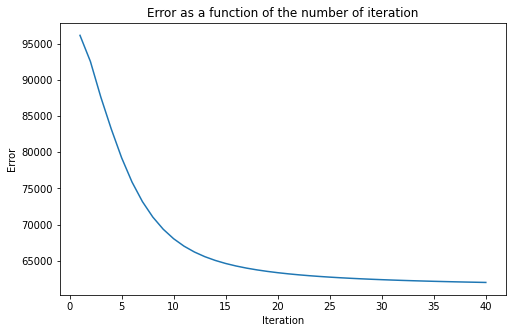

In [228]:
x = [i for i in range(1, 41)]
y = E

plt.figure(figsize=(8,5))
plt.plot(x, y)

plt.title('Error as a function of the number of iteration')

plt.ylabel('Error')
plt.xlabel('Iteration')

plt.savefig("error.png")
plt.show()